## 作成済みのモデルを使用してObject Detection APIを使用する

https://medium.com/towards-data-science/how-to-train-a-tensorflow-face-object-detection-model-3599dcd0c26f
https://github.com/qdraw/tensorflow-object-detection-tutorial


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [22]:
GRAPH = 'model_20171006/frozen_inference_graph.pb'

LABEL_MAP = '../../data/kanban_label_map.pbtxt'
NUM_CLASSES = 1

IMAGE = 'test_image02.jpg'
WIDTH = 640
HEIGHT = 360

In [23]:
##グラフを読み込み
detection_graph = tf.Graph()
with detection_graph.as_default():
    graph_def = tf.GraphDef()
    with tf.gfile.GFile(GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(graph_def, name='')

In [24]:
##ラベル付のためのインデックスを作成
label_map = label_map_util.load_labelmap(LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [25]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

##推論の実行
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as s:
        image = Image.open(IMAGE).resize((WIDTH, HEIGHT))
        image_array = load_image_into_numpy_array(image)
        image_arrays = np.expand_dims(image_array, axis=0)
        
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        (boxes, scores, classes, num_detections) = s.run(
            [boxes, scores, classes, num_detections], 
            feed_dict={image_tensor: image_arrays})
        
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_array, 
            np.squeeze(boxes), 
            np.squeeze(classes).astype(np.int32), 
            np.squeeze(scores), 
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8)

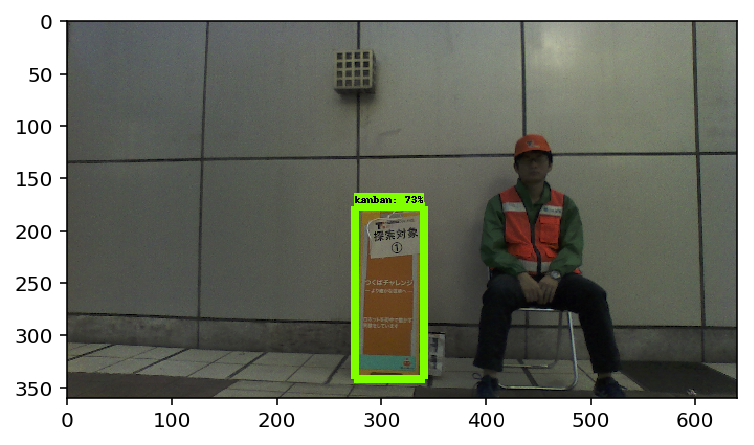

In [26]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

plt.imshow(image_array)